<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [3]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# FIXME

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [6]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [8]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

Dimensiones del dataset: (20640, 9)

Tipos de datos:
float64    9
Name: count, dtype: int64

Valores nulos por columna:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Uso total de memoria (bytes): 1486212


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


/tmp/ipython-input-3412477944.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=housing, x="target", palette="Set2")


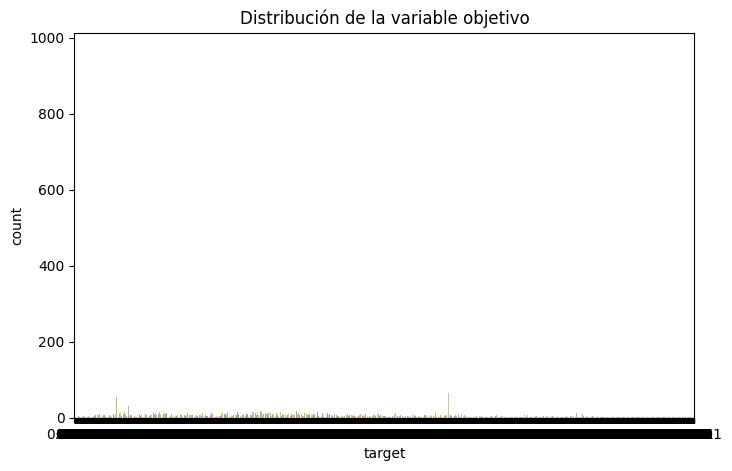

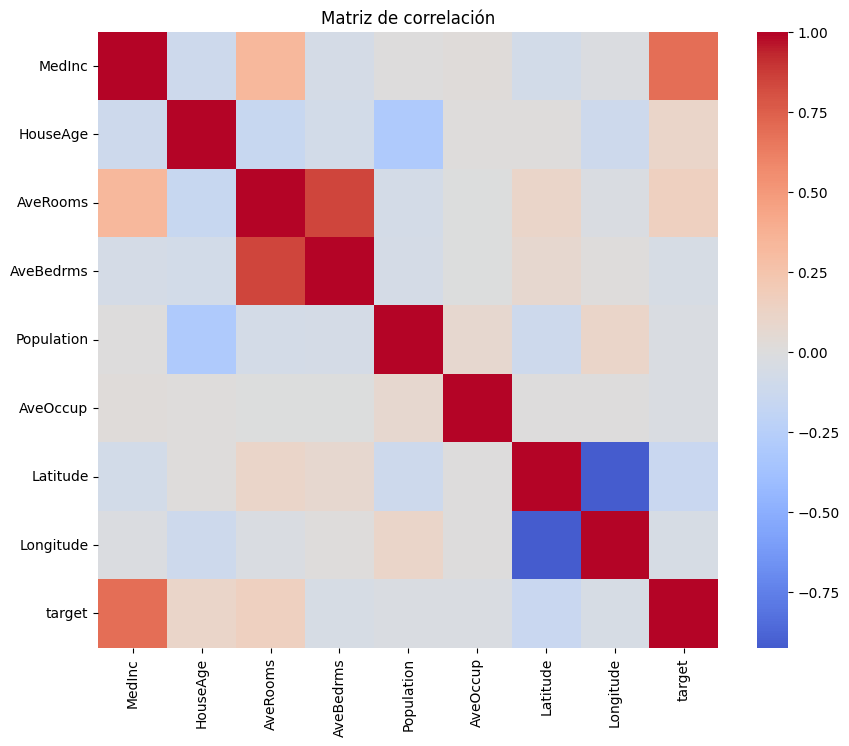

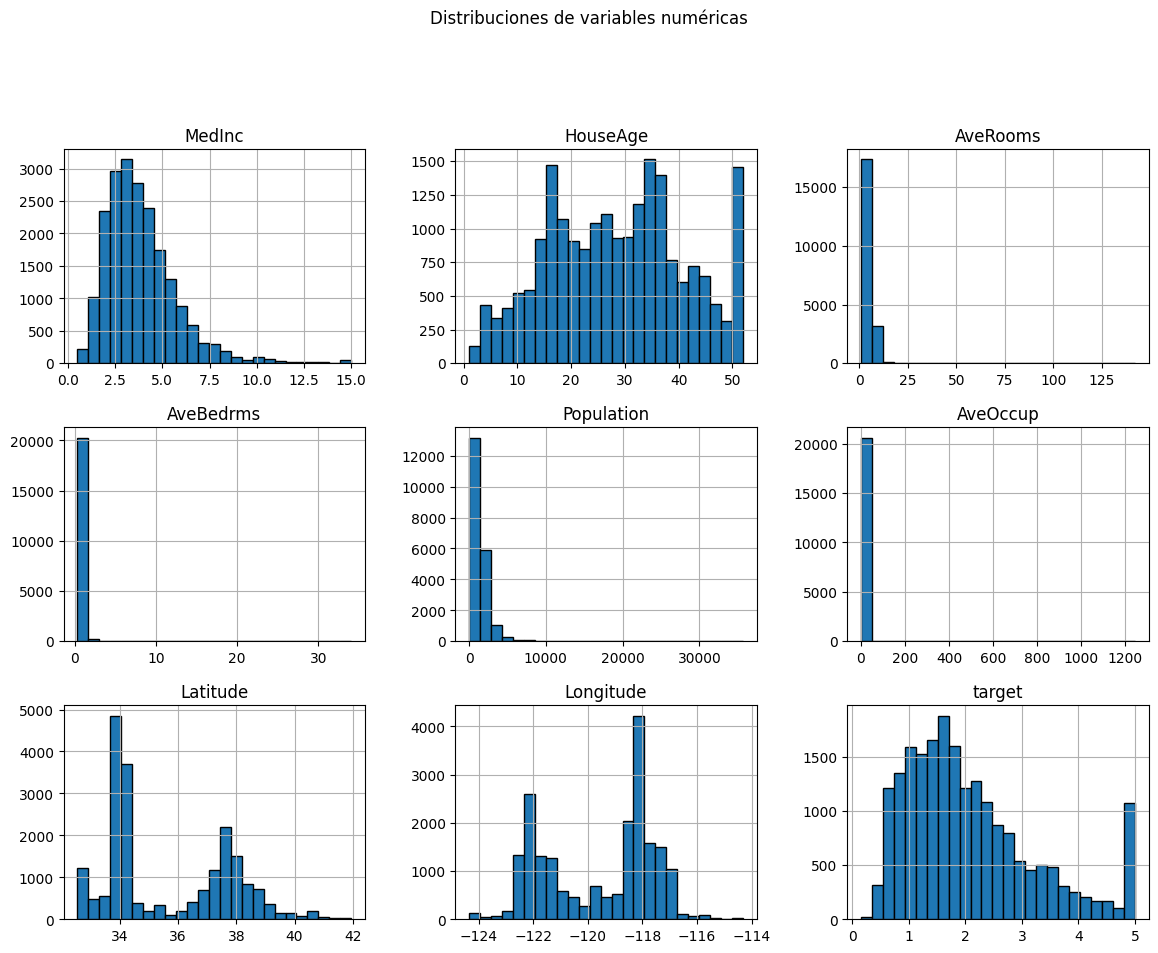

In [11]:
print("Dimensiones del dataset:", housing.shape)
print("\nTipos de datos:")
print(housing.dtypes.value_counts())

print("\nValores nulos por columna:")
print(housing.isna().sum())

# uso de memoria
print("\nUso total de memoria (bytes):", housing.memory_usage(deep=True).sum())

# estadísticas descriptivas
display(housing.describe(include='all').transpose())

# distribución de la variable objetivo
if "target" in housing.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=housing, x="target", palette="Set2")
    plt.title("Distribución de la variable objetivo")
    plt.show()

# correlaciones numéricas
corr = housing.select_dtypes("number").corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()

# distribución de variables numéricas
num_cols = housing.select_dtypes("number").columns
housing[num_cols].hist(figsize=(14,10), bins=25, edgecolor="black")
plt.suptitle("Distribuciones de variables numéricas", y=1.02)
plt.show()

# registros por clase (si existe variable categórica importante)
if "class" in housing.columns:
    print("\nConteo por clase:")
    print(housing["class"].value_counts())

¿Cómo se distribuyen los datos?
Las variables numéricas presentan distribuciones claramente asimétricas hacia la derecha, especialmente AveRooms, AveBedrms, Population y AveOccup, que muestran valores extremos bastante altos. Esto nos indica la existencia de zonas con viviendas inusualmente grandes o muy pobladas.
Por otro lado, MedInc (ingreso medio) y target (valor medio de la vivienda) muestran distribuciones algo más concentradas, aunque con colas largas hacia los valores altos, lo que sugiere que la mayoría de los hogares se ubican en zonas de ingresos y precios bajos o medios, con unos pocos sectores de alto valor.

¿Cuánta memoria estoy utilizando?
El conjunto de datos utiliza aproximadamente 1.48 MB.

¿Qué tipo de datos son?
Todas las variables son numéricas (float64), lo cual nos facilita el análisis estadístico y la aplicación de modelos de regresión. No existen columnas categóricas ni texto.

¿Cuántos registros por clase hay?
Este es un problema de regresión continua, no de clasificación, por lo que no hay clases definidas. Sin embargo, al observar la variable target, observamos que los valores se concentran entre 1 y 3, con una menor frecuencia de viviendas en los rangos de precios más altos.

¿Hay registros que no se correspondan con tu conocimiento previo?
No se encontraron valores nulos ni inconsistencias evidentes. Los rangos de Latitude y Longitude son coherentes con las coordenadas de California.
Se observan algunos outliers en AveRooms, AveBedrms, Population y AveOccup, que podrían representar casos de error de medición o poblaciones con características poco comunes.



### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [12]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

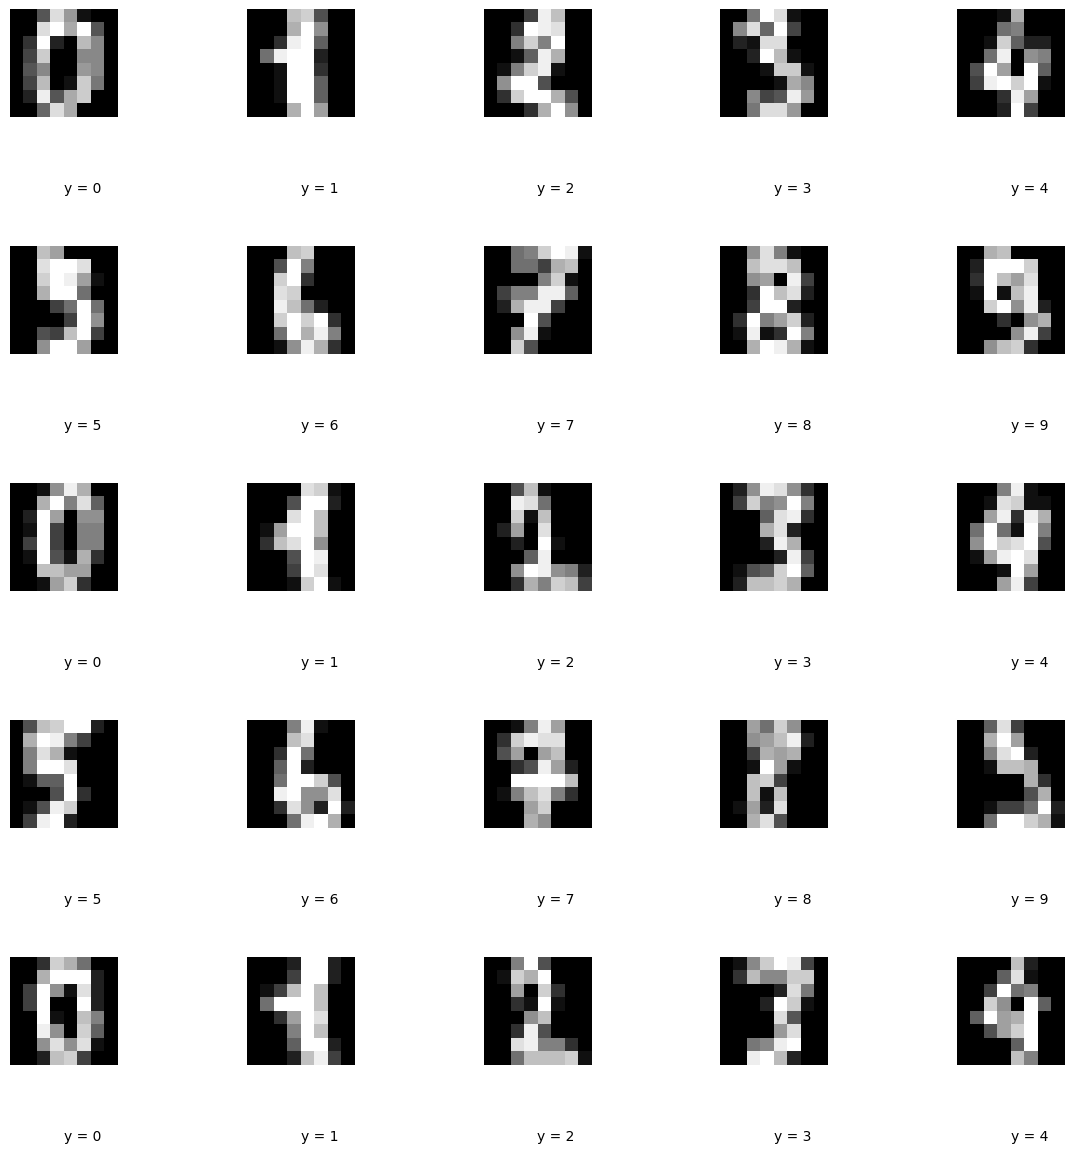

In [14]:
imgs   = digits_dict["images"]
labels = digits_dict["target"]

nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

for k, ax in enumerate(axs.ravel()[:nx*ny]):
    ax.imshow(imgs[k], cmap="gray")
    ax.text(0.5, -0.7, f"y = {labels[k]}", transform=ax.transAxes, fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


Tamaño del conjunto de entrenamiento: 1257
Tamaño del conjunto de testeo:       540

Entrenando modelo: Regresión Logística
Exactitud: 0.9815 | Tiempo: 0.139 s
Reporte de clasificación:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        54
           1     0.9455    0.9455    0.9455        55
           2     1.0000    1.0000    1.0000        53
           3     1.0000    1.0000    1.0000        55
           4     0.9815    0.9815    0.9815        54
           5     1.0000    0.9818    0.9908        55
           6     1.0000    0.9815    0.9907        54
           7     1.0000    1.0000    1.0000        54
           8     0.9074    0.9423    0.9245        52
           9     0.9815    0.9815    0.9815        54

    accuracy                         0.9815       540
   macro avg     0.9816    0.9814    0.9814       540
weighted avg     0.9818    0.9815    0.9816       540



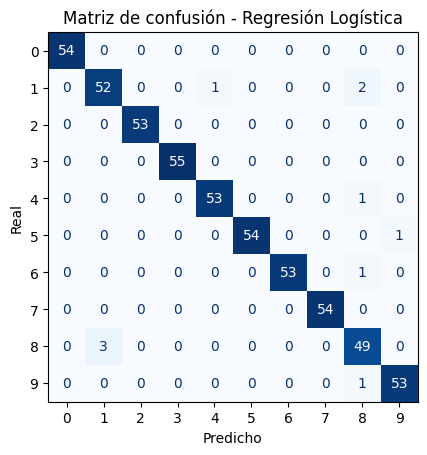


Entrenando modelo: KNN (k=5)
Exactitud: 0.9704 | Tiempo: 0.004 s
Reporte de clasificación:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        54
           1     0.9483    1.0000    0.9735        55
           2     0.9636    1.0000    0.9815        53
           3     0.9818    0.9818    0.9818        55
           4     0.9804    0.9259    0.9524        54
           5     0.9815    0.9636    0.9725        55
           6     0.9815    0.9815    0.9815        54
           7     0.9298    0.9815    0.9550        54
           8     0.9796    0.9231    0.9505        52
           9     0.9623    0.9444    0.9533        54

    accuracy                         0.9704       540
   macro avg     0.9709    0.9702    0.9702       540
weighted avg     0.9709    0.9704    0.9703       540



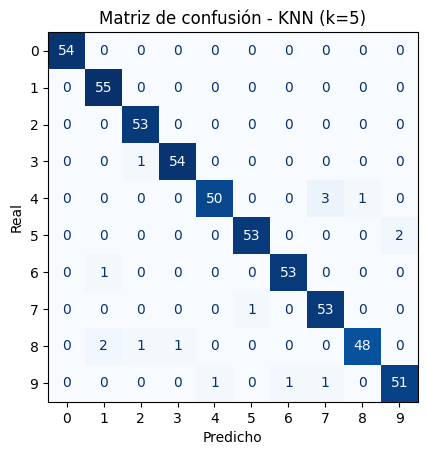


Entrenando modelo: SVM (RBF)
Exactitud: 0.9833 | Tiempo: 0.068 s
Reporte de clasificación:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        54
           1     0.9643    0.9818    0.9730        55
           2     1.0000    0.9811    0.9905        53
           3     1.0000    1.0000    1.0000        55
           4     0.9464    0.9815    0.9636        54
           5     1.0000    0.9818    0.9908        55
           6     0.9818    1.0000    0.9908        54
           7     0.9643    1.0000    0.9818        54
           8     1.0000    0.9423    0.9703        52
           9     0.9811    0.9630    0.9720        54

    accuracy                         0.9833       540
   macro avg     0.9838    0.9832    0.9833       540
weighted avg     0.9837    0.9833    0.9833       540



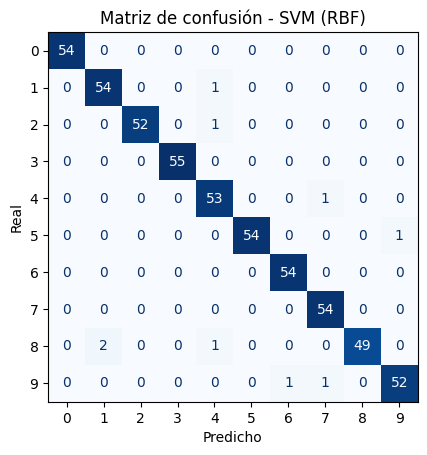


Entrenando modelo: Árbol de Decisión
Exactitud: 0.8519 | Tiempo: 0.030 s
Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9423    0.9074    0.9245        54
           1     0.8667    0.7091    0.7800        55
           2     0.7818    0.8113    0.7963        53
           3     0.9091    0.9091    0.9091        55
           4     0.8545    0.8704    0.8624        54
           5     0.8889    0.8727    0.8807        55
           6     0.9600    0.8889    0.9231        54
           7     0.8909    0.9074    0.8991        54
           8     0.7167    0.8269    0.7679        52
           9     0.7458    0.8148    0.7788        54

    accuracy                         0.8519       540
   macro avg     0.8557    0.8518    0.8522       540
weighted avg     0.8565    0.8519    0.8526       540



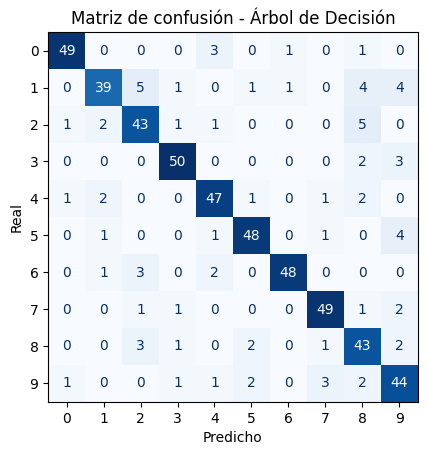


Entrenando modelo: Random Forest
Exactitud: 0.9685 | Tiempo: 0.925 s
Reporte de clasificación:
              precision    recall  f1-score   support

           0     1.0000    0.9630    0.9811        54
           1     0.9322    1.0000    0.9649        55
           2     1.0000    1.0000    1.0000        53
           3     0.9643    0.9818    0.9730        55
           4     0.9643    1.0000    0.9818        54
           5     1.0000    0.9818    0.9908        55
           6     1.0000    0.9815    0.9907        54
           7     0.9153    1.0000    0.9558        54
           8     0.9375    0.8654    0.9000        52
           9     0.9800    0.9074    0.9423        54

    accuracy                         0.9685       540
   macro avg     0.9694    0.9681    0.9680       540
weighted avg     0.9694    0.9685    0.9683       540



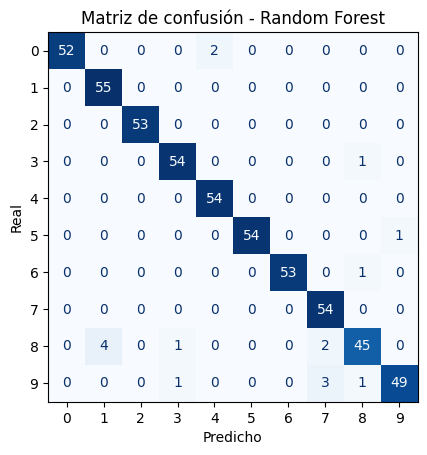


=== Resultados comparativos ===
Regresión Logística    -> Accuracy: 0.9815 | Tiempo: 0.139s
KNN (k=5)              -> Accuracy: 0.9704 | Tiempo: 0.004s
SVM (RBF)              -> Accuracy: 0.9833 | Tiempo: 0.068s
Árbol de Decisión      -> Accuracy: 0.8519 | Tiempo: 0.030s
Random Forest          -> Accuracy: 0.9685 | Tiempo: 0.925s


,accuracy,tiempo
SVM (RBF),0.983333,0.067708
Regresión Logística,0.981481,0.138580
KNN (k=5),0.970370,0.003615
Random Forest,0.968519,0.924513
Árbol de Decisión,0.851852,0.030029


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import matplotlib.pyplot as plt
import time

# 1) Train / test split

X = digits.drop(columns="target").values
y = digits["target"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de testeo:       {len(X_test)}")

# 2) Modelos (con estandarización si aplica)
#    - Pipelines para evitar fugas de datos
modelos = {
    "Regresión Logística": make_pipeline(
        StandardScaler(), LogisticRegression(max_iter=5000)
    ),
    "KNN (k=5)": make_pipeline(
        StandardScaler(), KNeighborsClassifier(n_neighbors=5)
    ),
    "SVM (RBF)": make_pipeline(
        StandardScaler(), SVC(kernel="rbf", gamma="scale")
    ),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
}

# 3) Entrenar, evaluar y cronometrar cada uno

resultados = {}
for nombre, modelo in modelos.items():
    print(f"\nEntrenando modelo: {nombre}")
    t0 = time.time()
    modelo.fit(X_train, y_train)
    t1 = time.time()

    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    duracion = t1 - t0

    resultados[nombre] = {"accuracy": acc, "tiempo": duracion}

    print(f"Exactitud: {acc:.4f} | Tiempo: {duracion:.3f} s")
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", colorbar=False)
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicho"); plt.ylabel("Real")
    plt.show()

# 4) Resumen comparativo

print("\n=== Resultados comparativos ===")
for nombre, datos in resultados.items():
    print(f"{nombre:22s} -> Accuracy: {datos['accuracy']:.4f} | Tiempo: {datos['tiempo']:.3f}s")

res_df = pd.DataFrame(resultados).T.sort_values(["accuracy","tiempo"], ascending=[False,True])
display(res_df)


¿Cuál modelo es mejor basado en sus métricas?

El modelo con mejor desempeño global fue el SVM, alcanzando una exactitud de 0.9833 aprox, ligeramente superior a la de la regresión logística 0.9815 y por encima del resto.

¿Cuál modelo demora menos tiempo en ajustarse?

El modelo más rápido fue K-Nearest Neighbors , con un tiempo de entrenamiento de apenas 0.004 s, ya que no requiere una fase de ajuste de parámetros como otros modelos.

¿Qué modelo escoges?

En este conjunto, el SVM resulta ser el modelo más confiable y equilibrado, ya que logra la mayor exactitud y mantiene un tiempo razonable.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

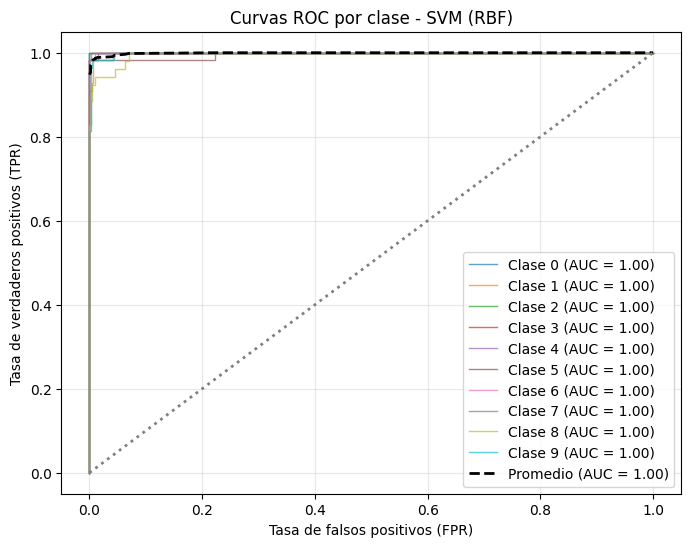

In [19]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

# 1. Preparar los datos
X = digits.drop(columns="target").values
y = digits["target"].values
n_classes = len(np.unique(y))

# Convertir las etiquetas a formato binario (One-vs-Rest)
y_bin = label_binarize(y, classes=range(n_classes))

X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.3, random_state=42, stratify=y
)

# 2. Entrenar el mejor modelo (SVM con RBF)
svm = OneVsRestClassifier(SVC(kernel="rbf", gamma="scale", probability=True))
svm.fit(X_train, y_train)

# 3. Predecir probabilidades
y_score = svm.predict_proba(X_test)


# 4. Calcular curvas ROC y AUC por clase
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Curva ROC promedio
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)

# 5. Graficar las curvas ROC
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1, alpha=0.7,
             label=f"Clase {i} (AUC = {roc_auc[i]:.2f})")

plt.plot(all_fpr, mean_tpr, color='black', lw=2, linestyle='--',
         label=f"Promedio (AUC = {roc_auc['macro']:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle=':', lw=2)
plt.title("Curvas ROC por clase - SVM (RBF)")
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


El gráfico demuestra que el modelo SVM logra una clasificación casi perfecta, con una excelente separación entre clases y sin evidencia de confusión significativa. Esto valida plenamente su elección como el mejor modelo del laboratorio.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [20]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

 Ej. correctamente clasificados:


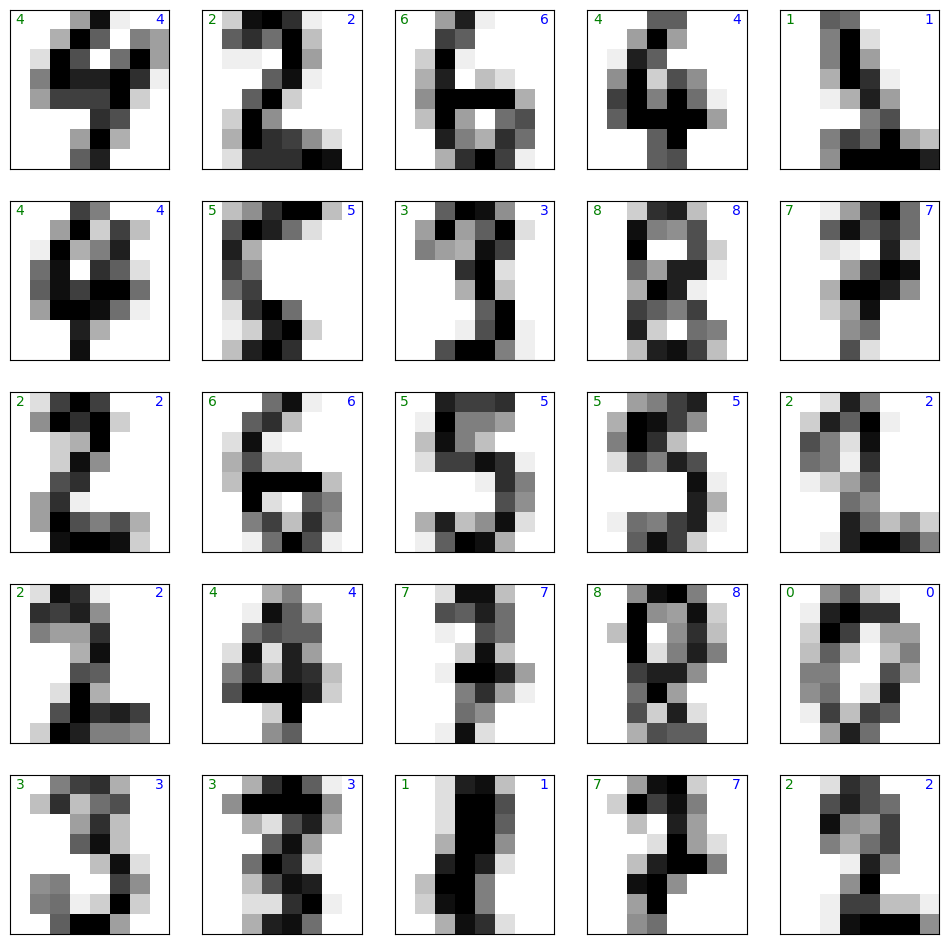

Ej. incorrectamente clasificados:


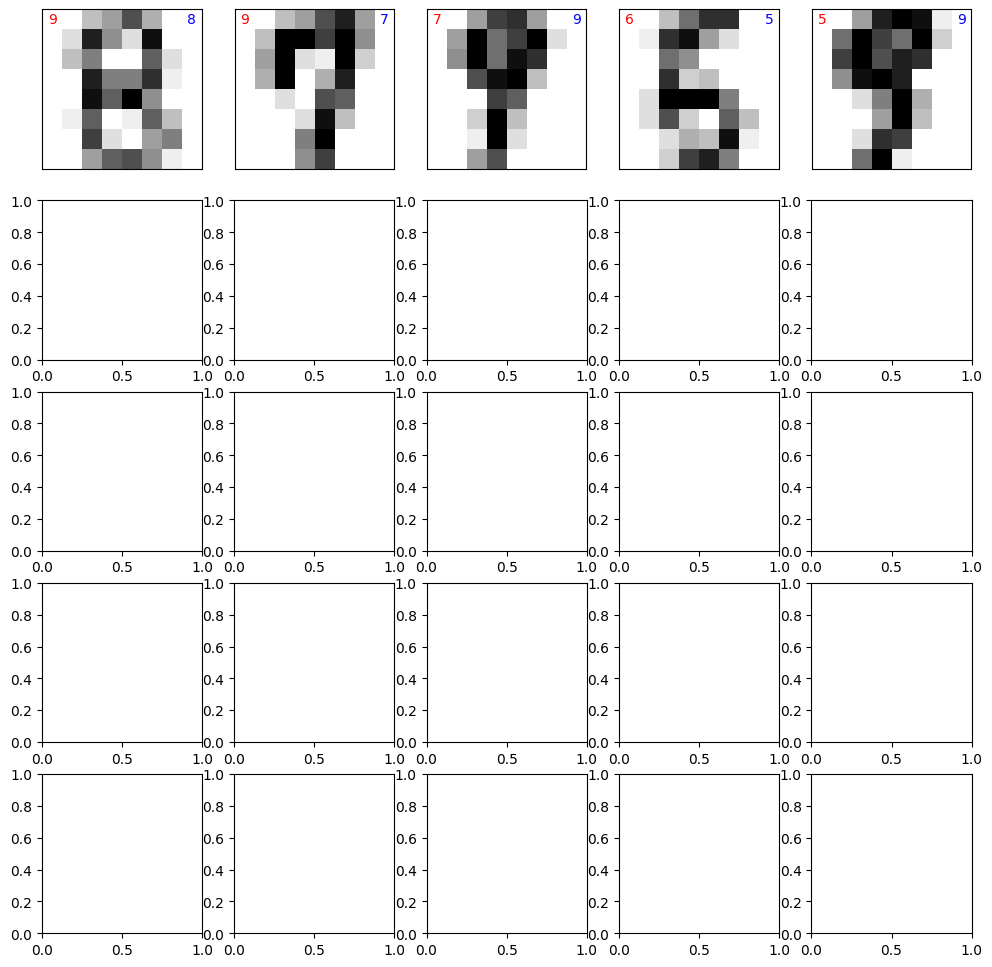

In [24]:
X = digits.drop(columns="target").values
y = digits["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_svm = SVC(kernel="rbf", probability=True, random_state=42)
modelo_svm.fit(X_train, y_train)

print(" Ej. correctamente clasificados:")
mostrar_resultados(digits, modelo_svm, nx=5, ny=5, label="correctos")
print("Ej. incorrectamente clasificados:")
mostrar_resultados(digits, modelo_svm, nx=5, ny=5, label="incorrectos")



**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?


Cuando el valor predicho y original son distintos. Las fallas se deben a que el modelo se confunde con los dígitos escritos de forma poco clara o con partes faltantes, por ejemplo un “9” parecido a un “4”, o un “8” cerrado que parece “3”, etc.


### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

En la etapa de Machine Learning, el modelo SVM obtuvo el mejor rendimiento, alcanzando una exactitud cercana al 98 % y un AUC promedio de 1.00, superando a los modelos de KNN, Regresión Logística, etc.
Los pocos errores se atribuyen a dígitos con trazos confusos, deformados o incompletos. En general, el SVM demostró excelente capacidad de generalización y precisión, clasificando correctamente la mayoría de los casos.